In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2

In [1]:
# img = cv2.imread('_2.png')
img = mpimg.imread('2.png')
plt.imshow(img)
plt.show()

NameError: name 'mpimg' is not defined

In [147]:
img.shape

(460, 646, 4)

In [148]:
#function gray scale 
def rgbtogray(image):
    r,g,b=image[:,:,0],image[:,:,1],image[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [149]:
grayScale=rgbtogray(img)
grayScale.shape

(460, 646)

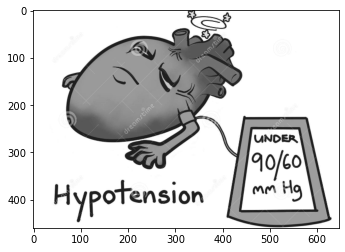

In [150]:
plt.imshow(grayScale,cmap="gray")
plt.show()

In [151]:
image=cv2.imread('2.png',0)
image=image/255

In [152]:
def salt_and_paper(img):
    row , col = img.shape
    g = np.zeros((row,col), dtype=np.float32)
    salt=0.95
    pepper=0.1
    for i in range(row):
        for j in range(col):
            rdn = np.random.random()
            if rdn < pepper:
                g[i][j] = 0
            elif rdn > salt:
                g[i][j] = 1
            else:
                g[i][j] = img[i][j]
    return g

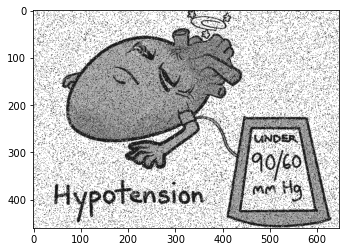

In [153]:
salt_paper=salt_and_paper(image)
plt.imshow(salt_paper,cmap="gray")
plt.show()

In [154]:
#low : lower boundry of output interval
#high: Upper boundary of the output interval. All values generated will be less than or equal to high. The high limit may be included in the returned array of floats due to floating-point rounding in the equation low + (high-low) * random_sample(). The default value is 1.0.
def uniform_noise(img):
    row,col=img.shape
    low = 0
    high = 1
    uni = np.zeros((row,col), dtype=np.float64)
    for i in range(row):
        for j in range(col):
            uni[i][j] = np.random.uniform(low,high)
    img=img+uni
    return img

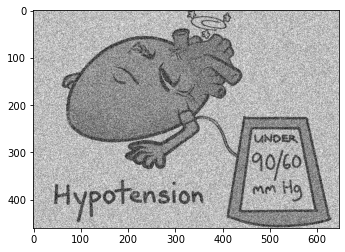

In [155]:
uniform_noise_img=uniform_noise(image)
plt.imshow(uniform_noise_img,cmap="gray")
plt.show()

In [156]:
def gaussion_noise(img):
    row,col=img.shape
    mean=0
    var=0.1
    sigma=var**0.5
    gaussion_noise = np.random.normal(loc=mean, scale=sigma, size=(row,col))
    img=img+gaussion_noise
    return img

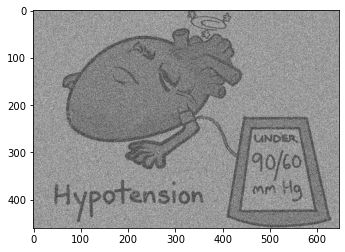

In [157]:
gaussion= gaussion_noise(image)
plt.imshow(gaussion,cmap="gray")
plt.show()

In [158]:
def median_filter(noise_image):
    row,col=noise_image.shape
    filtered_image=np.zeros([row,col])
    #loop on every window 3*3 in the image
    for i in range (1,row-1):
        for j in range (1,col-1):
            image=[noise_image[i-1, j-1],
                   noise_image[i-1, j],
                   noise_image[i-1, j + 1],
                   noise_image[i, j-1],
                   noise_image[i, j],
                   noise_image[i, j + 1],
                   noise_image[i + 1, j-1],
                   noise_image[i + 1, j],
                   noise_image[i + 1, j + 1]]
            image=sorted(image)
            filtered_image[i, j]=image[4]
    filtered_image = filtered_image.astype(np.uint8)
    return filtered_image

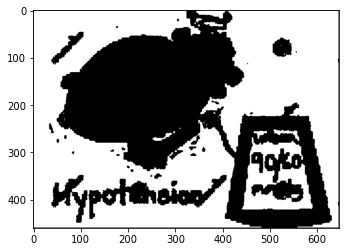

In [159]:
# noised_image=gaussion_noise(image)
filtered=median_filter(image)
plt.imshow(filtered,cmap="gray")
plt.show()